In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [147]:
import platform
platform.python_version()

'3.9.7'

In [45]:
#lets call the dataset first as data
data=pd.read_csv("marketing_campaign.csv",sep="\t")

# 1.Preparation data

In [7]:
data.head(5) #check the 5 head data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


we have to check the missing value and duplicate data

In [13]:
data.info() #we can check the general information data in this point

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Observation:
1. Data contains 29 columns with 2240 rows
2. only Income have missing values
3. most column have int datatype (include Income)
4. all data types seems good

In [12]:
#1. missing value
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [15]:
#2. duplicate data
data.duplicated().sum()

0

in this section, we got:
1. there is 24 data NA as missing value
2. there is no duplicate data in this data set

# 2.Cleaning data

In [28]:
#we can use mean for fill the missing value in the Income column
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


observation :
1. all maximum and minimum value have decent value in all column

In [31]:
data.isnull().sum()*100/len(data)
#the missing value less than 5% in this dataset

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [47]:
data = data.fillna(data["Income"].mean())

In [48]:
#now there is no missing value in this data set and we can go to the next step
print("the missing value now :",data.isnull().sum())

the missing value now : ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


# 3.Data Preprocessing

we can make a new column for less column

In [76]:
data["SpentProducts"] = data.apply(lambda data: data["MntFishProducts"] + data["MntFruits"] + data["MntGoldProds"] + data["MntMeatProducts"] + data["MntSweetProducts"] + data["MntWines"], axis=1)
data["children"] = data.apply(lambda data: data["Kidhome"] + data["Teenhome"], axis=1)
data["TotalAccepted"] = data.apply(lambda data: data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'], axis = 1)
data['TotalofPurchases'] = data.apply(lambda data: data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases'], axis = 1)


In [79]:
data = data.drop(['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases','AcceptedCmp5',
                  'AcceptedCmp4','AcceptedCmp3','AcceptedCmp2','AcceptedCmp1','MntFruits','MntGoldProds','MntMeatProducts',
                  'MntSweetProducts','MntWines','Kidhome','Teenhome','Z_CostContact','Z_Revenue','MntFishProducts'],axis=1)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2240 non-null   int64  
 1   Year_Birth         2240 non-null   int64  
 2   Education          2240 non-null   object 
 3   Marital_Status     2240 non-null   object 
 4   Income             2240 non-null   float64
 5   Dt_Customer        2240 non-null   object 
 6   Recency            2240 non-null   int64  
 7   NumWebVisitsMonth  2240 non-null   int64  
 8   Complain           2240 non-null   int64  
 9   Response           2240 non-null   int64  
 10  SpentProducts      2240 non-null   int64  
 11  children           2240 non-null   int64  
 12  TotalAccepted      2240 non-null   int64  
 13  TotalofPurchases   2240 non-null   int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 245.1+ KB


In [95]:
numerical = ["TotalofPurchases","children","NumWebVisitsMonth","Recency","Income"]

C:\Users\Fajriocta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fajriocta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Fajriocta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

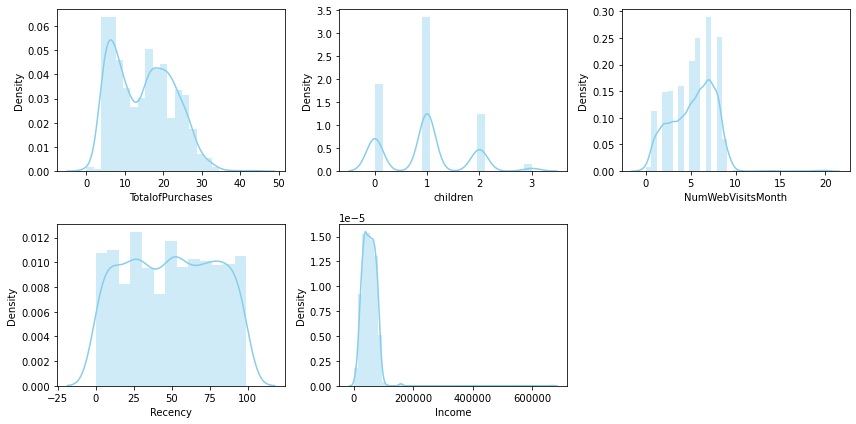

In [96]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numerical
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=data[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

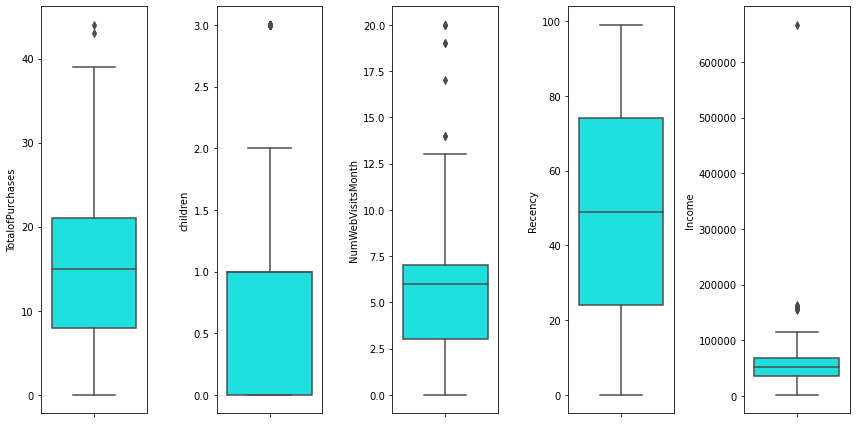

In [97]:
plt.figure(figsize=(12,6))

features = numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='cyan')
    plt.tight_layout()

In [102]:
#we can delete the outlier in Income column
data = data.drop(data.loc[data['Income'] > 600000].index)

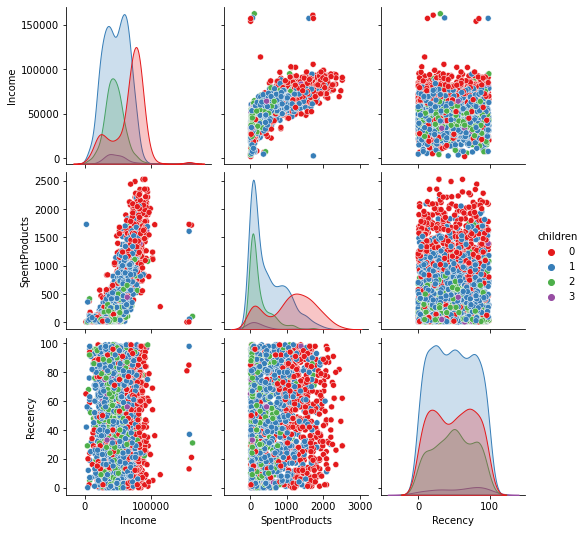

In [111]:
#we can group the data based on how many children they have and use the scatter plot
pairplot = data.loc[:, ["Income", "SpentProducts", "Recency", "children"]]
sns.pairplot(pairplot, hue = "children", palette ='Set1')

Text(0.5, 1.0, 'SpentProducts VS Income')

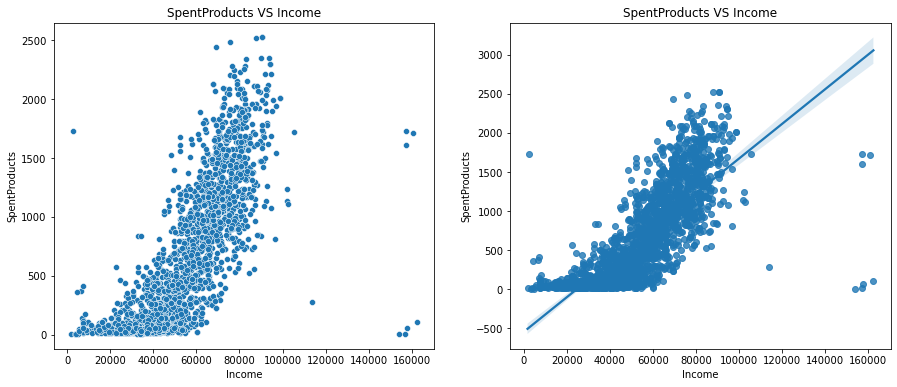

In [143]:
#we can see the SpentProducts and Income show a relationship
fig, axes = plt.subplots(1,2, figsize=(15,6))
sns.scatterplot(y=data['SpentProducts'], x=data['Income'], ax=axes[0])
sns.regplot(y='SpentProducts', x='Income', data=data, ax=axes[1])
axes[0].set_title("SpentProducts VS Income")
axes[1].set_title("SpentProducts VS Income")

observation

1. the relationship between SpentProducts and Income give positive correlation
2. the addition of SpentProducts is due to the increasing of "income
3. the more value income, the higher SpentProducts value

# EDA conclusion

1. there is 24 or 1.7% missing value in Income column.
2. for the maximum and minimum value have decent value in all column
3. Most of the columns are numeric
4. by the barplot we can check the outlier in Income column
5. by the pairplot we can check all correlation in data set
6. by scatter plot of SpentProducts vs Income, we can assume the more value income, the higher SpentProducts value